In [1]:
%run library.ipynb

In [4]:
eas_ld  = fromfile_tril('../common/ld/22.eas.ld.bin')
eas_ld2 = eas_ld**2
eas_ld2_adj = eas_ld2 - (1-eas_ld2)/(4502-2)

eas_jr  = fromfile_tril('../common/ld/22.eas.jackknife.r')
eas_jr2 = fromfile_tril('../common/ld/22.eas.jackknife.r2')

eur_ld  = fromfile_tril('../common/ld/22.eur.ld.bin')
eur_ld2 = eur_ld**2
eur_ld2_adj = eur_ld2 - (1-eur_ld2)/(57880-2)

eur_jr  = fromfile_tril('../common/ld/22.eur.jackknife.r')
eur_jr2 = fromfile_tril('../common/ld/22.eur.jackknife.r2')

eur_4500_ld  = fromfile_tril('../common/ld/22.eur.4500.00.ld.bin')
eur_4500_ld2 = eur_4500_ld**2
eur_4500_ld2_adj = eur_4500_ld2-(1-eur_4500_ld2)/(4500-2)

eur_4500_jr  = fromfile_tril('../common/ld/22.eur.4500.00.jackknife.r')
eur_4500_jr2 = fromfile_tril('../common/ld/22.eur.4500.00.jackknife.r2')

In [5]:
bim = pd.read_table('../common/bfile/22.bim', delim_whitespace=True, names=['CHR', 'SNP', 'MORG', 'POS', 'A1', 'A2'])

In [6]:
dist = np.abs(bim.POS[:,None] - bim.POS[None,:])

In [7]:
M = dist.shape[1]

In [8]:
Mt = 500
typed = nr.choice(M, Mt, replace=False)

In [9]:
trd_ld     = tau_ratio_distance(np.array([eas_ld, eur_ld]), typed, dist)
trd_ld_adj = tau_ratio_distance(np.array([eas_ld, eur_ld]), typed, dist, np.array([eas_ld2_adj, eur_ld2_adj]))
trd_jr     = tau_ratio_distance(np.array([eas_jr, eur_jr]), typed, dist)
trd_jr2    = tau_ratio_distance(np.array([eas_jr, eur_jr]), typed, dist, np.array([eas_jr2, eur_jr2]))

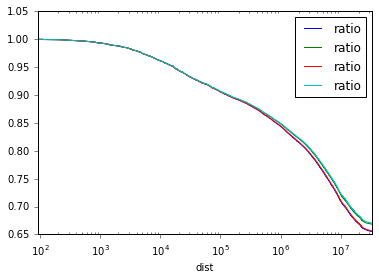

In [10]:
ax = plt.gca()
trd_ld.plot('dist', 'ratio', ax=ax, logx=True)
trd_ld_adj.plot('dist', 'ratio', ax=ax, logx=True)
trd_jr.plot('dist', 'ratio', ax=ax, logx=True)
trd_jr2.plot('dist', 'ratio', ax=ax, logx=True)

ax.tick_params(direction='out', top='off', right='off')

plt.show()

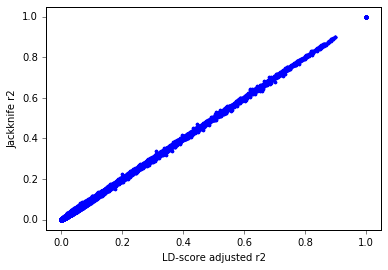

In [14]:
plt.plot(eas_ld2_adj.flatten(), eas_jr2.flatten(), '.', markeredgecolor=None)

plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])

plt.xlabel('LD-score adjusted r2')
plt.ylabel('Jackknife r2')

ax = plt.gca()

ax.tick_params(direction='out', top='off', right='off')

plt.show()

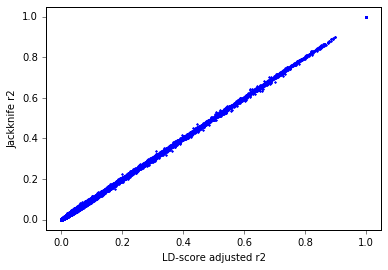

In [15]:
plt.plot(eas_ld2_adj.flatten(), eas_jr2.flatten(), '.', ms=3, markeredgecolor=None)

plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])

plt.xlabel('LD-score adjusted r2')
plt.ylabel('Jackknife r2')

ax = plt.gca()

ax.tick_params(direction='out', top='off', right='off')

plt.show()